In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:




from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



train_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\csvs\TRAINFINAL8FEATURESEXTRA_CLEANED.xlsx")
test_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\csvs\TESTFINAL8FEATURESEXTRA_CLEANED.xlsx")


# print("Train columns: ", train_data.columns)
# print("Test columns: ", test_data.columns)

columns_to_drop = ['Genre',
                 'File Name'
                 'Onsets',
                    #'Harmonic Mean', 
                    #'Percussive Mean',
                    #'CQT Mean',
                    'Genre',
                    'File Name',
                    'Beat Sync MFCC Mean',
                    'Rhythm Complexity',	
                    #'Tempo',	
                    #'Tempogram Mean'
                 
                 ]  # List of columns to drop

X_train = train_data.select_dtypes(include=[float, int]).drop(columns=columns_to_drop, axis=1, errors='ignore')
y_train = train_data['Genre']
X_test = test_data.select_dtypes(include=[float, int]).drop(columns=columns_to_drop, axis=1, errors='ignore')
y_test = test_data['Genre']



label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy on test set: 0.7514

Classification Report:
              precision    recall  f1-score   support

   AFROHOUSE       0.88      0.96      0.92       500
     AMBIENT       0.83      0.84      0.83       500
   BASSHOUSE       0.74      0.77      0.76       500
   BASSMUSIC       0.59      0.60      0.59       500
     BIGROOM       0.78      0.76      0.77       500
 DRUMANDBASS       0.67      0.74      0.70       500
     DUBSTEP       0.74      0.71      0.73       500
   HARDSTYLE       0.77      0.68      0.72       500
       PHONK       0.74      0.70      0.72       500
   PSYTRANCE       0.78      0.76      0.77       500

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000




----- Random Forest -----
Accuracy: 0.7488
Classification Report:
              precision    recall  f1-score   support

   AFROHOUSE       0.88      0.95      0.91       500
     AMBIENT       0.80      0.83      0.82       500
   BASSHOUSE       0.75      0.76      0.76       500
   BASSMUSIC       0.59      0.60      0.60       500
     BIGROOM       0.78      0.77      0.77       500
 DRUMANDBASS       0.68      0.76      0.72       500
     DUBSTEP       0.74      0.70      0.72       500
   HARDSTYLE       0.75      0.69      0.72       500
       PHONK       0.74      0.68      0.71       500
   PSYTRANCE       0.77      0.75      0.76       500

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000


----- SVM -----
Accuracy: 0.6826
Classification Report:
              precision    recall  f1-score   support

   AFROHOUSE       0.88      0.93      0.91       500
     AMB

c:\Users\ashut\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6620
Classification Report:
              precision    recall  f1-score   support

   AFROHOUSE       0.87      0.92      0.89       500
     AMBIENT       0.76      0.78      0.77       500
   BASSHOUSE       0.64      0.66      0.65       500
   BASSMUSIC       0.53      0.52      0.53       500
     BIGROOM       0.55      0.53      0.54       500
 DRUMANDBASS       0.58      0.55      0.56       500
     DUBSTEP       0.63      0.64      0.63       500
   HARDSTYLE       0.67      0.70      0.68       500
       PHONK       0.70      0.63      0.66       500
   PSYTRANCE       0.67      0.71      0.69       500

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000


----- Decision Tree -----
Accuracy: 0.6354
Classification Report:
              precision    recall  f1-score   support

   AFROHOUSE       0.88      0.89      0.89       500
     AMBIENT       0.73  

c:\Users\ashut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ashut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ashut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashut\AppData\Local\Temp\ipyker

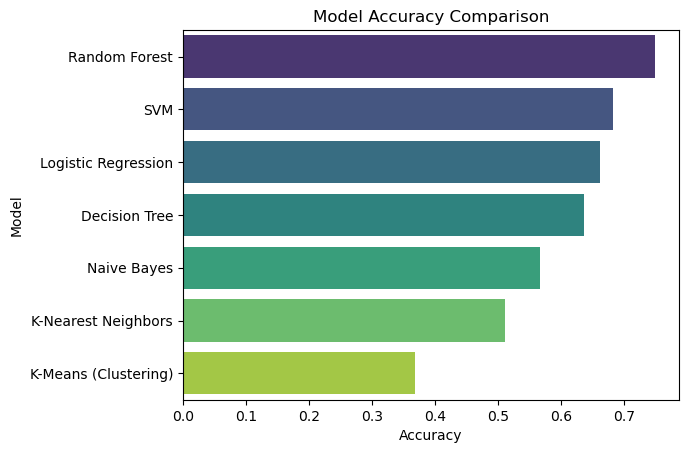

C:\Users\ashut\AppData\Local\Temp\ipykernel_44980\571902209.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mismatches", y="Actual", data=mismatch_table, palette="mako")



Mismatches by Actual Class:
        Actual  Mismatches
0    AFROHOUSE          26
1      AMBIENT          85
2    BASSHOUSE         119
3    BASSMUSIC         198
4      BIGROOM         116
5  DRUMANDBASS         122
6      DUBSTEP         148
7    HARDSTYLE         157
8        PHONK         158
9    PSYTRANCE         127


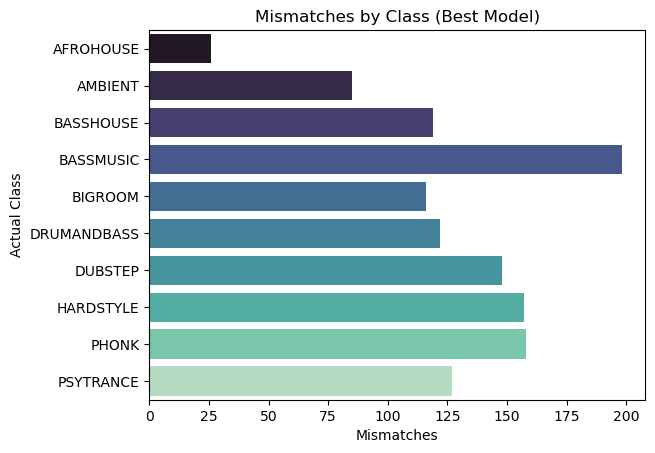

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

# Load data
train_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\csvs\TRAINFINAL8FEATURESEXTRA_CLEANED.xlsx")
test_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\csvs\TESTFINAL8FEATURESEXTRA_CLEANED.xlsx")

# Define columns to drop
columns_to_drop = ['Genre', 'File Name', 'Onsets', 'Beat Sync MFCC Mean', 'Rhythm Complexity']

# Prepare features and labels
X_train = train_data.select_dtypes(include=[float, int]).drop(columns=columns_to_drop, axis=1, errors='ignore')
y_train = train_data['Genre']
X_test = test_data.select_dtypes(include=[float, int]).drop(columns=columns_to_drop, axis=1, errors='ignore')
y_test = test_data['Genre']

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "K-Means (Clustering)": KMeans(n_clusters=len(label_encoder.classes_), random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")
    if model_name == "K-Means (Clustering)":
        model.fit(X_train_scaled)
        y_pred = model.predict(X_test_scaled)
        # Map clusters to labels using majority vote for interpretability
        cluster_labels = {}
        for cluster in range(model.n_clusters):
            cluster_labels[cluster] = np.bincount(y_train[model.labels_ == cluster]).argmax()
        y_pred = np.array([cluster_labels[cluster] for cluster in y_pred])
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Save results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Predictions": y_pred
    })

# Create a barplot for accuracy scores
accuracy_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

# Create a table for differences between actual and predicted labels
best_model = max(results, key=lambda x: x['Accuracy'])
comparison_df = pd.DataFrame({
    "Actual": label_encoder.inverse_transform(y_test),
    "Predicted": label_encoder.inverse_transform(best_model['Predictions'])
})
comparison_df["Difference"] = comparison_df["Actual"] != comparison_df["Predicted"]

# Count mismatches by class
mismatch_counts = comparison_df[comparison_df["Difference"]].groupby("Actual").size()
mismatch_table = mismatch_counts.reset_index(name="Mismatches")

# Display mismatch table
print("\nMismatches by Actual Class:")
print(mismatch_table)

# Visualize mismatches
sns.barplot(x="Mismatches", y="Actual", data=mismatch_table, palette="mako")
plt.title("Mismatches by Class (Best Model)")
plt.xlabel("Mismatches")
plt.ylabel("Actual Class")
plt.show()
